In [78]:
!pip install textblob 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 6.7 MB/s eta 0:00:0000:0100:01


In [37]:
# Import dependencies
import pandas as pd
import numpy as np
import pymysql as mysql
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import getpass
warnings.filterwarnings('ignore')

### Connecting pandas to MySQL database

In [13]:
conn = mysql.connect(host='localhost',
                    port = int(3306),
                    user = 'root',
                    passwd=getpass.getpass('Enter password:'),
                    db="Airbnb_DB")

df = pd.read_sql_query("Show tables ", conn)
print(df)

Enter password:········
  Tables_in_airbnb_db
0            calendar
1            listings
2             reviews


# Calendar

In [49]:
# Sql statement to extract the Calender dataset
cal_df = pd.read_sql("select * from calendar", conn)
cal_df.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,None
3,241032,2016-01-07,f,None
4,241032,2016-01-08,f,None


### EDA Analysis

In [50]:
cal_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [51]:
# change the data type
cal_df['date'] = pd.to_datetime(cal_df['date'])

# remove dollar sign and convert to float
cal_df['price'] = cal_df['price'].str.replace('$', '').str.replace(',','').astype(float)

In [52]:
cal_df.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [29]:
# shape of the dataframe
print(f'calendar dataframe shape {cal_df.shape}')

calendar dataframe shape (1048575, 4)


In [30]:
# print the null values of calendar dataset
cal_df.isnull().sum()

listing_id         0
date               0
available          0
price         348713
dtype: int64

In the calendar dataset we have 348713 null values for the `price` column which, indicates that the listing was unavailable for particular days. We do not consider removing those columns.

In [75]:
# let's find out the first date and last of listing in calendar dataset 
first_date = cal_df["date"].min()
last_date = cal_df['date'].max()
print(f'The first date of listing is: {first_date}')
print(f'The first date of listing is: {last_date}')


The first date of listing is: 2016-01-04 00:00:00
The first date of listing is: 2017-01-02 00:00:00


### What is the average price of listings? 

Text(0, 0.5, 'Price ($)')

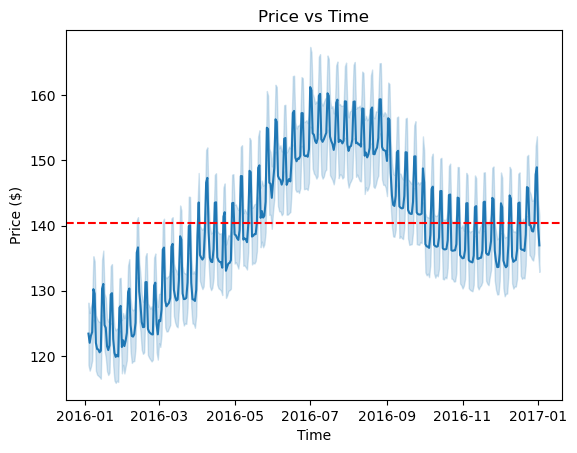

In [63]:
average_price = cal_df['price'].mean()

ax = sns.lineplot(x = "date", y = "price", data = cal_df)
ax.axhline(y=average_price, color='r', linestyle='--', label='Average Price')
plt.title('Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price ($)')

As we can see from the above chart, the average price for listing is around 140$. The prices goes up during summer (June, July, August, and September) which is an indication of seasonality. 

### Which months have the highest availability during the year? 

In [67]:
cal_df['available'] = cal_df['available'].replace({ 't': 1, 'f': 0 })
cal_df

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN
...,...,...,...,...
1048570,5386937,2016-10-20,1,120.0
1048571,5386937,2016-10-21,1,120.0
1048572,5386937,2016-10-22,1,120.0
1048573,5386937,2016-10-23,1,120.0


<AxesSubplot:xlabel='date'>

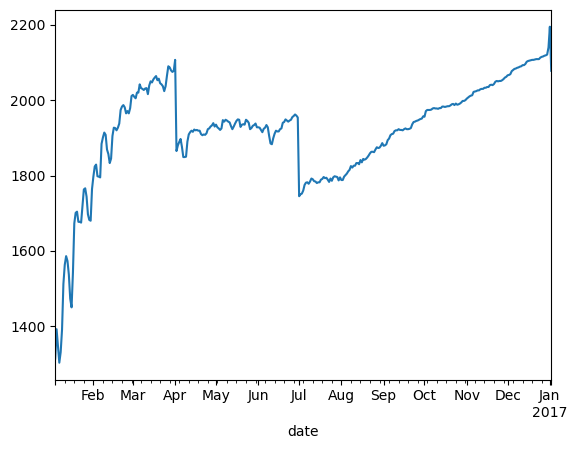

In [70]:
availability_df = cal_df.groupby('date').sum()['available']
availability_df.plot(kind='line')

Booking numbers start increasing from Jan till end of March, the we can see a huge drop in April. Another drop we can see in July but, after July the booking rate starts increasing

# Reviews

In [94]:
# Sql statement to extract the Calender dataset
rev_df = pd.read_sql("select * from reviews", conn)
rev_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [95]:
rev_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [96]:
# shape of the dataframe
print(f'calendar dataframe shape {rev_df.shape}')

calendar dataframe shape (84849, 6)


In [97]:
rev_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

We have 18 null values in the `comments` column. 

We have a small number of null values, removing those rows may be a reasonable option. We use dropna() function to remove rows with null values

In [98]:
# drop null values in comments column
rev_df_clean = rev_df.dropna(subset=['comments'])

In [99]:
# Check the shape of the dataframe after removing the null values
print(f'calendar dataframe shape {rev_df_clean.shape}')

calendar dataframe shape (84831, 6)


In [102]:
# Sentimental Analysis to find out positive and negative comments
from textblob import TextBlob


# Define a function to get the sentiment polarity of each comment
def get_sentiment(comment):
    blob = TextBlob(comment)
    return blob.sentiment.polarity

# Create a new column with the sentiment label and use the sentiment label function on the "sentiment" column
rev_df_clean["sentiment"] = rev_df_clean["comments"].apply(get_sentiment)

# Define a function to map the polarity score to a "positive" or "negative" label
def get_sentiment_label(score):
    if score >= 0:
        return "positive"
    else:
        return "negative"

# Apply the sentiment label function to the "sentiment" column and create a new column with the sentiment label
rev_df_clean["sentiment_label"] = rev_df_clean["sentiment"].apply(get_sentiment_label)

rev_df_clean

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment,sentiment_label
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,0.433333,positive
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,0.301136,positive
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",0.410417,positive
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,0.358333,positive
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,0.493485,positive
...,...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,0.194844,positive
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,0.311111,positive
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",0.000000,positive
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",0.216852,positive


<AxesSubplot:xlabel='sentiment_label'>

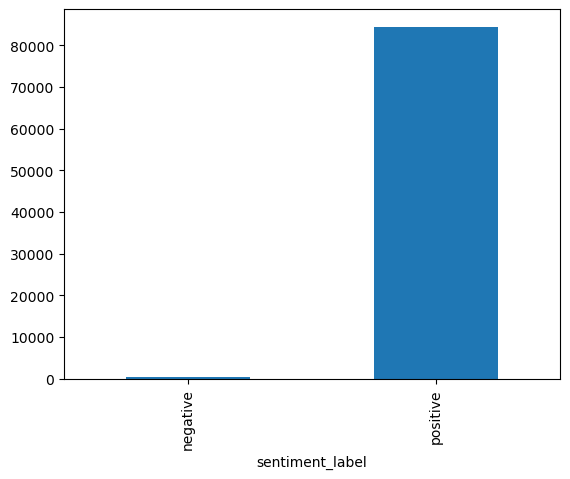

In [105]:
rev_df_clean.groupby('sentiment_label').count()['sentiment'].plot(kind='bar')

As we can see the above bar chart most of the users wrote positive comments for the hosts.